# Importing libary

In [1]:
#importing the package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to display all row and column
pd.set_option('display.max_columns', None)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Read the csv

In [2]:
# read the csv data
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [3]:
data.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1


### about data
Target feature -> click
site features -> site_id, site_domain, site_category
app feature -> app_id, app_domain, app_category
device feature -> device_id, device_ip, device_model, device_type, device_conn_type
anonymized categorical features -> C14-C21

# EDA

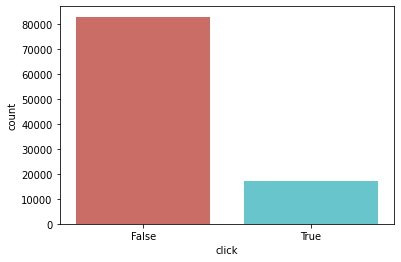

In [4]:
#see the target variable
sns.countplot(x='click',data=data, palette='hls')
plt.show();

In [5]:
data['click'].value_counts()/len(data)
#click through rate is approx. 17%, and approx. 83% is not clicked

False    0.830198
True     0.169802
Name: click, dtype: float64

In [6]:
#all 24 hours click rate is present
len(data.hour.value_counts())

24

In [7]:
len(data.day.value_counts())

10

In [8]:
data.day.value_counts()

22    13092
28    13056
30    10495
21    10213
29     9742
23     9519
26     9326
24     8264
25     8258
27     8034
Name: day, dtype: int64

The data covers 10 days of click streams data from 2014-10-21 to 2014-10-30, that is 240 hours.

Text(0.5, 1.0, 'Number of clicks by hour')

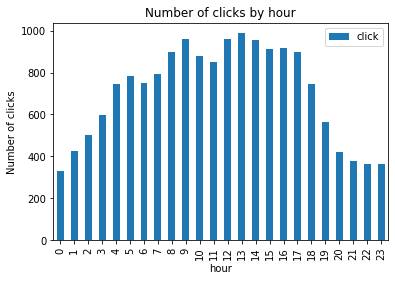

In [9]:

data.groupby('hour').agg({'click':'sum'}).plot.bar()
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour')

Text(0.5, 1.0, 'Number of clicks by day')

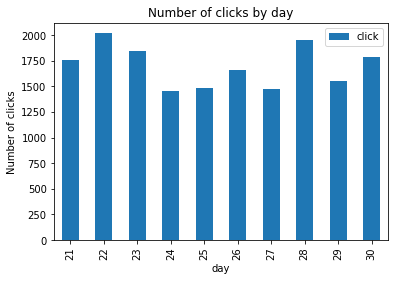

In [10]:
data.groupby('day').agg({'click':'sum'}).plot.bar()
plt.ylabel('Number of clicks')
plt.title('Number of clicks by day')

Text(0.5, 1.0, 'Number of clicks')

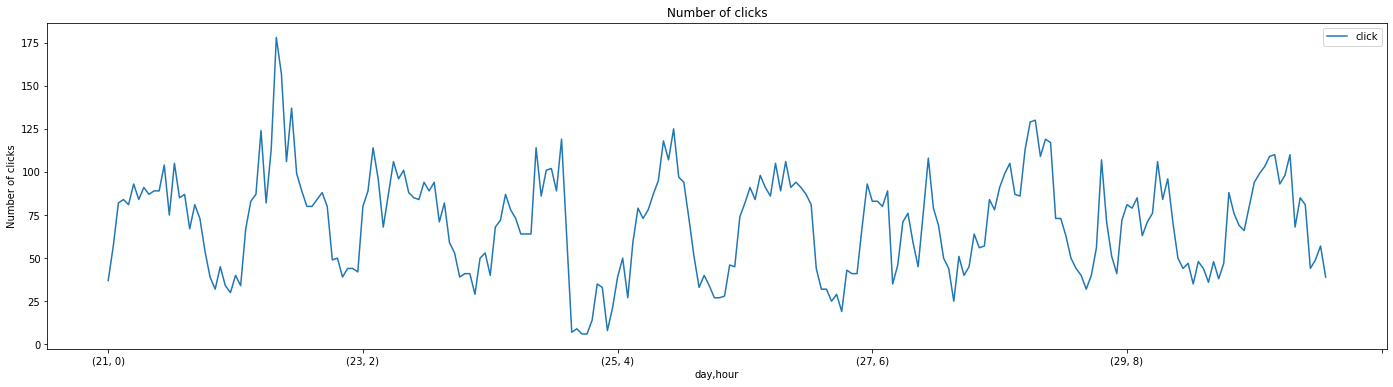

In [11]:
data.groupby(['day','hour']).agg({'click':'sum'}).plot(figsize=(24,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks')

In [12]:
data.month.value_counts()
#all column contain same month 


10    99999
Name: month, dtype: int64

In [13]:
data.drop('month', axis=1, inplace=True)

In [14]:
data.y.value_counts()
#as year column is not making sense so dropping the y column
data.drop('y', axis=1, inplace=True)

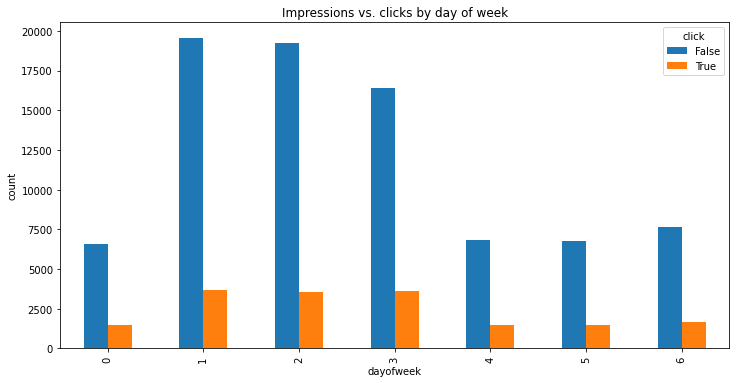

In [15]:
#Tuesdays have the most impressions and clicks, then Wednesdays, 
#followed by Thursdays. Mondays and Fridays have the least number of impressions and clicks.
data.groupby(['dayofweek', 'click']).size().unstack().plot(kind='bar', title="Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Impressions vs. clicks by day of week');

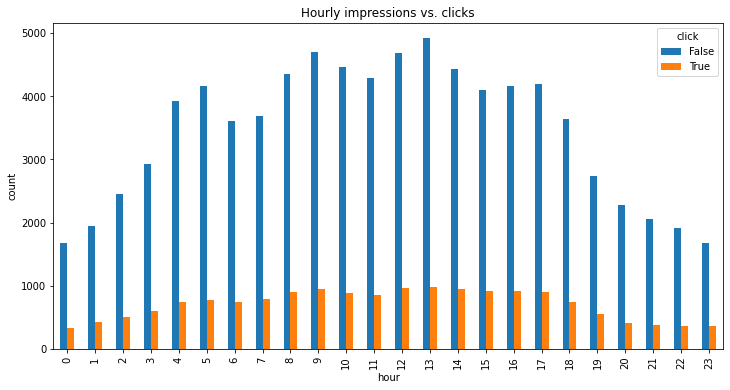

In [16]:
data.groupby(['hour', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

Now that we have click and impression. We can calculate Click-through rate (CTR). CTR is the ratio of ad clicks to impressions. It measures the rate of clicks on each ad.

Hourly CTR

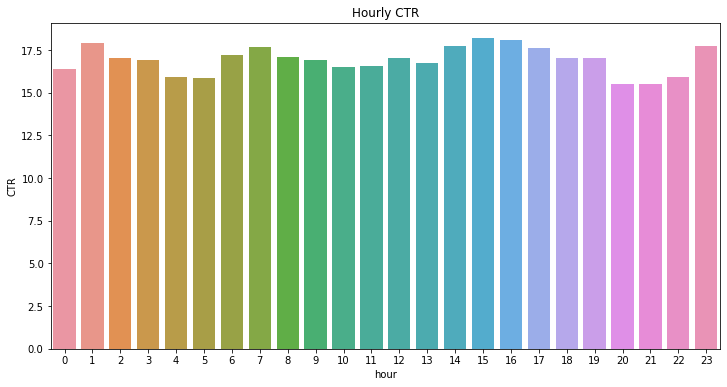

In [17]:
df_click = data[data['click'] == 1]
df_hour = data[['hour','click']].groupby(['hour']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour','click']].groupby(['hour']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour', data=df_hour)
plt.title('Hourly CTR')

plt.show()
#One of the interesting observations here is that the highest CTR happened in the hour of 
#mid-night, 1, 7 and 15. If you remember, around mid-night has the least number of impressions and clicks.

Day of week CTR

   dayofweek  impressions  clicks        CTR
0          0         8034    1474  18.347025
1          1        23269    3707  15.931067
2          2        22834    3570  15.634580
3          3        20014    3630  18.137304
4          4         8264    1458  17.642788
5          5         8258    1483  17.958343
6          6         9326    1658  17.778254


Text(0.5, 1.0, 'Day of week CTR')

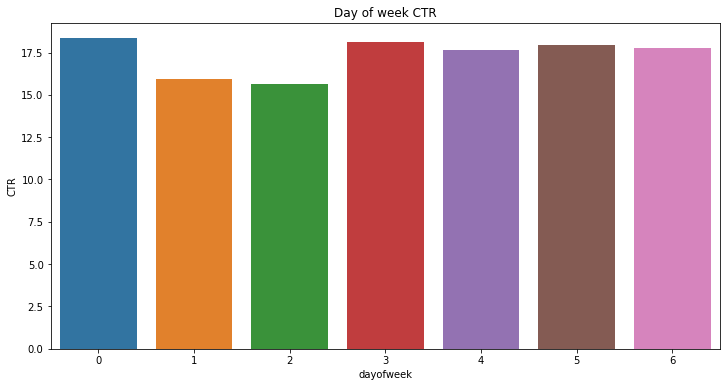

In [18]:
df_click = data[data['click'] == 1]
df_dayofweek = data[['dayofweek','click']].groupby(['dayofweek']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['dayofweek','click']].groupby(['dayofweek']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100
print(df_dayofweek)
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='dayofweek', data=df_dayofweek)
plt.title('Day of week CTR')

While Tuesdays and Wednesdays have the highest number of impressions and clicks, their CTR are among the lowest. Saturdays and Sundays enjoy the highest CTR. Apparently, people have more time to click over the weekend.

## Banner position

In [19]:
print(data.banner_pos.value_counts()/len(data))

0    0.717787
1    0.280523
7    0.001070
2    0.000300
4    0.000190
5    0.000090
3    0.000040
Name: banner_pos, dtype: float64


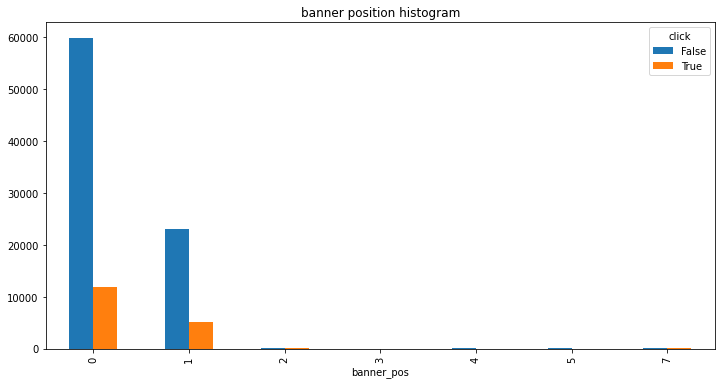

In [20]:
data.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

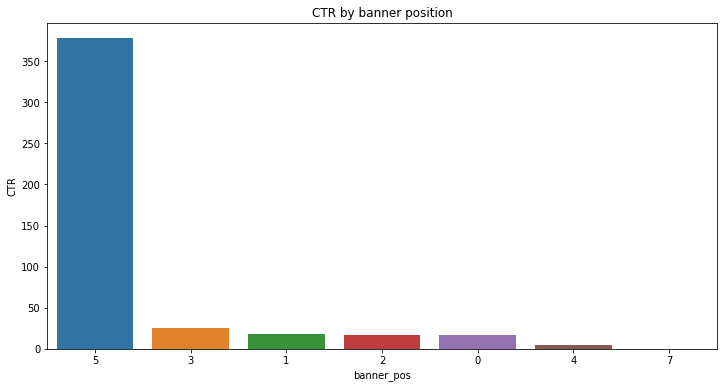

In [21]:
df_banner = data[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

In [22]:
data.site_id.value_counts()

85f751fd    36022
1fbe01fe    15862
e151e245     6597
d9750ee7     2376
5b08c53b     2305
            ...  
9e1b18be        1
27e10723        1
1661bb7f        1
1edf0277        1
bf991633        1
Name: site_id, Length: 1485, dtype: int64

Site features

In [23]:
print("There are {} sites in the data set".format(data.site_id.nunique()))

There are 1485 sites in the data set


In [24]:
print('The top 10 site ids that have the most impressions')
print((data.site_id.value_counts()/len(data))[0:10])

The top 10 site ids that have the most impressions
85f751fd    0.360224
1fbe01fe    0.158622
e151e245    0.065971
d9750ee7    0.023760
5b08c53b    0.023050
5b4d2eda    0.019270
856e6d3f    0.018800
a7853007    0.011710
b7e9786d    0.009540
5bcf81a2    0.008250
Name: site_id, dtype: float64


In [25]:
top10_ids = (data.site_id.value_counts()/len(data))[0:10].index
click_avg_list=[]

for i in top10_ids:
    click_avg=data.loc[np.where((data.site_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site id value: {},  click through rate: {}".format(i,click_avg))

for site id value: 85f751fd,  click through rate: 0.12109266559324856
for site id value: 1fbe01fe,  click through rate: 0.20287479510780482
for site id value: e151e245,  click through rate: 0.29649840836743974
for site id value: d9750ee7,  click through rate: 0.2815656565656566
for site id value: 5b08c53b,  click through rate: 0.45770065075921906
for site id value: 5b4d2eda,  click through rate: 0.1209133367929424
for site id value: 856e6d3f,  click through rate: 0.03404255319148936
for site id value: a7853007,  click through rate: 0.10845431255337319
for site id value: b7e9786d,  click through rate: 0.0639412997903564
for site id value: 5bcf81a2,  click through rate: 0.10545454545454545


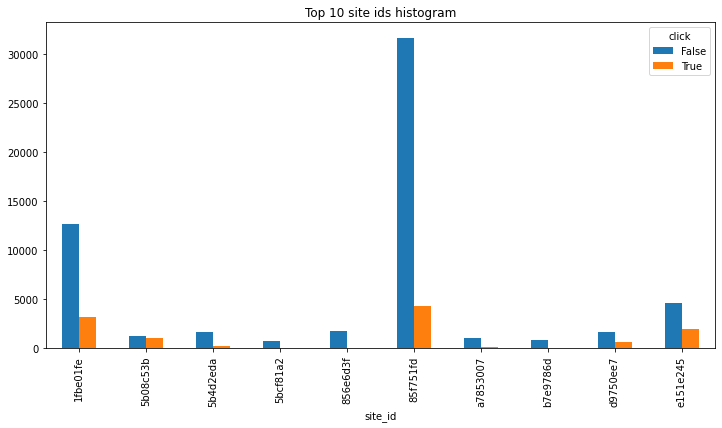

In [26]:
top10_sites = data[(data.site_id.isin((data.site_id.value_counts()/len(data))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]
top10_sites.groupby(['site_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site ids histogram');

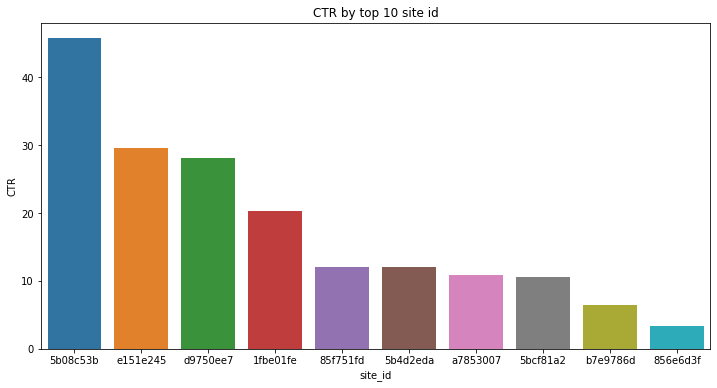

In [27]:
df_site = top10_sites[['site_id','click']].groupby(['site_id']).count().reset_index()
df_site = df_site.rename(columns={'click': 'impressions'})
df_site['clicks'] = top10_sites_click[['site_id','click']].groupby(['site_id']).count().reset_index()['click']
df_site['CTR'] = df_site['clicks']/df_site['impressions']*100
sort_site = df_site.sort_values(by='CTR',ascending=False)['site_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_id', data=df_site, order=sort_site)
plt.title('CTR by top 10 site id');


The site_id feature seems important because the CTR for the top 10 sites, some as high as 0.47, and some as low as 0.04, and they are significantly different from overall CTR 0.16.

## site domain

In [28]:
print("There are {} site domains in the data set".format(data.site_domain.nunique()))

There are 1331 site domains in the data set


In [29]:
print('The top 10 site domains that have the most impressions')
print((data.site_domain.value_counts()/len(data))[0:10])

The top 10 site domains that have the most impressions
c4e18dd6    0.373624
f3845767    0.158622
7e091613    0.082801
7687a86e    0.032200
98572c79    0.024560
16a36ef3    0.021370
58a89a43    0.018800
b12b9f85    0.009710
9d54950b    0.009090
17d996e6    0.008260
Name: site_domain, dtype: float64


In [30]:
top10_domains = (data.site_domain.value_counts()/len(data))[0:10].index
click_avg_list=[]

for i in top10_domains:
    click_avg=data.loc[np.where((data.site_domain == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site domain value: {},  click through rate: {}".format(i,click_avg))

for site domain value: c4e18dd6,  click through rate: 0.12555537712113912
for site domain value: f3845767,  click through rate: 0.20287479510780482
for site domain value: 7e091613,  click through rate: 0.25881642512077296
for site domain value: 7687a86e,  click through rate: 0.4605590062111801
for site domain value: 98572c79,  click through rate: 0.28094462540716614
for site domain value: 16a36ef3,  click through rate: 0.13242863827795975
for site domain value: 58a89a43,  click through rate: 0.03404255319148936
for site domain value: b12b9f85,  click through rate: 0.06694129763130793
for site domain value: 9d54950b,  click through rate: 0.09900990099009901
for site domain value: 17d996e6,  click through rate: 0.32929782082324455


## site category

In [31]:
print("There are {} site categories in the data set".format(data.site_category.nunique()))

There are 19 site categories in the data set


In [32]:
print('The top 10 site categories that have the most impressions')
print((data.site_category.value_counts()/len(data))[0:10])

The top 10 site categories that have the most impressions
50e219e0    0.408394
f028772b    0.314083
28905ebd    0.181072
3e814130    0.076681
f66779e6    0.006340
75fa27f6    0.003920
335d28a8    0.003580
76b2941d    0.002470
c0dd3be3    0.001040
72722551    0.000640
Name: site_category, dtype: float64


In [33]:
top10_categories = (data.site_category.value_counts()/len(data))[0:10].index
click_avg_list=[]

for i in top10_categories:
    click_avg=data.loc[np.where((data.site_category == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site category value: {},  click through rate: {}".format(i,click_avg))

for site category value: 50e219e0,  click through rate: 0.13122260584245451
for site category value: f028772b,  click through rate: 0.17670657157412123
for site category value: 28905ebd,  click through rate: 0.205942453194897
for site category value: 3e814130,  click through rate: 0.2841679707876891
for site category value: f66779e6,  click through rate: 0.04258675078864353
for site category value: 75fa27f6,  click through rate: 0.09948979591836735
for site category value: 335d28a8,  click through rate: 0.09497206703910614
for site category value: 76b2941d,  click through rate: 0.016194331983805668
for site category value: c0dd3be3,  click through rate: 0.09615384615384616
for site category value: 72722551,  click through rate: 0.078125


## Device features
device id

In [34]:
print("There are {} devices in the data set".format(data.device_id.nunique()))

There are 16801 devices in the data set


In [35]:
top10_devices = (data.device_id.value_counts()/len(data))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=data.loc[np.where((data.device_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: a99f214a,  click through rate: 0.172586250741714
for device id value: c357dbff,  click through rate: 0.6935483870967742
for device id value: 0f7c61dc,  click through rate: 0.7647058823529411
for device id value: afeffc18,  click through rate: 0.23529411764705882
for device id value: 936e92fb,  click through rate: 0.037037037037037035
for device id value: cef4c8cc,  click through rate: 0.25
for device id value: 28dc8687,  click through rate: 0.0
for device id value: d857ffbb,  click through rate: 0.2222222222222222
for device id value: 9af87478,  click through rate: 0.0
for device id value: 02da5312,  click through rate: 0.25


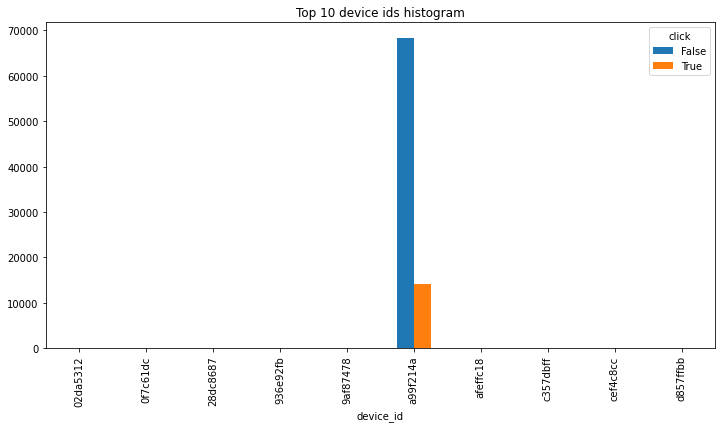

In [36]:
top10_device = data[(data.device_id.isin((data.device_id.value_counts()/len(data))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 device ids histogram');

You will see that most of device_id is a99f214a : Approx. 83% of the data, and the second major device_id is only 0.05% of the data. And there are some extremely high CTR here with device id at 0f7c61dc.

## device ip
Device ip is more of a users ip address, so, there are a lot of them.

In [37]:
print("There are {} device ips in the data set".format(data.device_ip.nunique()))
print("There are {} device types in the data set".format(data.device_type.nunique()))
print("There are {} device models in the data set".format(data.device_model.nunique()))
print("There are {} device cnn types in the data set".format(data.device_conn_type.nunique()))

There are 78013 device ips in the data set
There are 4 device types in the data set
There are 3145 device models in the data set
There are 4 device cnn types in the data set


device type

In [38]:
print('The impressions by device types')
print((data.device_type.value_counts()/len(data)))

The impressions by device types
1    0.922399
0    0.054941
4    0.019310
5    0.003350
Name: device_type, dtype: float64


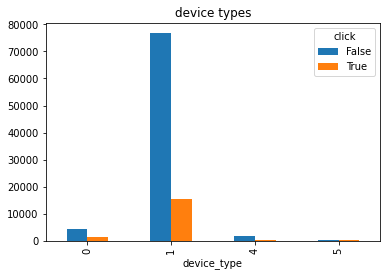

In [39]:
data[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

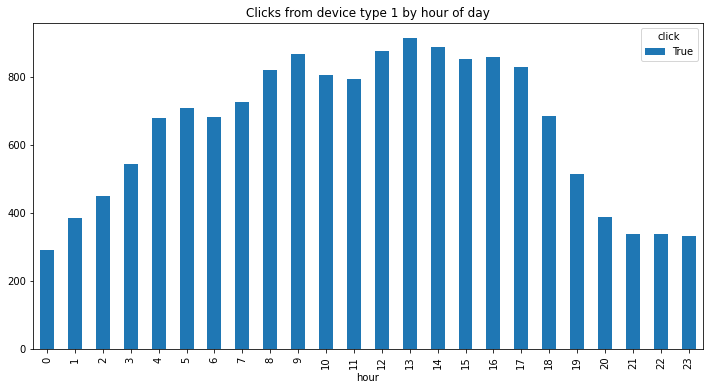

In [40]:
df_click[df_click['device_type']==1].groupby(['hour', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

As expected, most clicks happened during the business hours from device type 1. device type is definitely an important feature.

In [41]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = data.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')

In [42]:
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100

In [43]:
merged_device_type

,device_type,click,impressions,CTR
0,0,1206,5494,21.951220
1,1,15551,92239,16.859463
2,4,184,1931,9.528742
3,5,39,335,11.641791


The highest CTR comes from device type 0.

## app features

In [44]:
print("There are {} apps in the data set".format(data.app_id.nunique()))
print("There are {} app domains in the data set".format(data.app_domain.nunique()))
print("There are {} app categories in the data set".format(data.app_category.nunique()))

There are 1354 apps in the data set
There are 96 app domains in the data set
There are 21 app categories in the data set


In [45]:
print('The impressions by app categories')
print((data.app_category.value_counts()/len(data)))

The impressions by app categories
07d7df22    0.647696
0f2161f8    0.236442
cef3e649    0.043000
8ded1f7a    0.035190
f95efa07    0.028680
d1327cf5    0.003150
dc97ec06    0.001400
09481d60    0.001290
75d80bbe    0.000810
4ce2e9fc    0.000670
fc6fa53d    0.000580
a3c42688    0.000320
879c24eb    0.000220
4681bb9d    0.000210
0f9a328c    0.000130
a86a3e89    0.000060
2281a340    0.000060
8df2e842    0.000050
7113d72a    0.000020
a7fd01ec    0.000010
79f0b860    0.000010
Name: app_category, dtype: float64


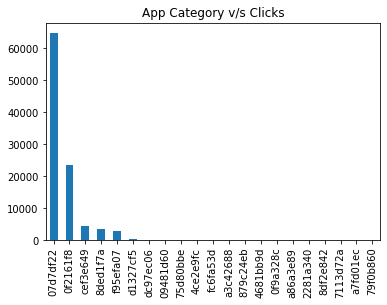

In [46]:
data['app_category'].value_counts().plot(kind='bar', title='App Category v/s Clicks')

## C14 - C21 features

In [47]:
print("There are {} C14 in the data set".format(data.C14.nunique()))
print("There are {} C15 in the data set".format(data.C15.nunique()))
print("There are {} C16 in the data set".format(data.C16.nunique()))
print("There are {} C17 in the data set".format(data.C17.nunique()))
print("There are {} C18 in the data set".format(data.C18.nunique()))
print("There are {} C19 in the data set".format(data.C19.nunique()))
print("There are {} C20 in the data set".format(data.C20.nunique()))

There are 1722 C14 in the data set
There are 8 C15 in the data set
There are 9 C16 in the data set
There are 399 C17 in the data set
There are 4 C18 in the data set
There are 64 C19 in the data set
There are 154 C20 in the data set


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

all integer type

In [49]:
print(data.isnull().sum())

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dayofweek           0
day                 0
hour                0
dtype: int64


Data set has no missing values

# One hot encoding

In [50]:
data.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,1,28,14
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,2,22,19
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,3,23,18
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,2,22,19
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,1,21,8


In [51]:
data.device_conn_type.value_counts()

0    86413
2     8043
3     5428
5      115
Name: device_conn_type, dtype: int64

In [52]:
onehot_features = ['day', 'hour','banner_pos','dayofweek','site_category','app_category','device_type','device_conn_type']

In [53]:
data_2 = pd.get_dummies(data, columns = onehot_features,drop_first=True)

In [54]:
data_2.columns[10:]

Index(['C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'banner_pos_1',
       'banner_pos_2', 'banner_pos_3', 'banner_pos_4', 'banner_pos_5',
       'banner_pos_7', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3',
       'dayofweek_4', 'dayofweek_5', 'dayofweek_6', 'site_category_28905ebd',
       'site_category_335d28a8', 'site_category_3e814130',
       'site_category_42a36e14', 'site_category_50e219e0',
       'site_category_5378d028', 'site_category_70fb0e29',
       'site_category_72722551', 'site_category_75fa27f6',
       'site_category_76b2941d', 'site_category_8fd0aea4',
       'site_category_9ccfa2ea', 'site_category

Converting click to 0 and 1

In [55]:
data_2.click = data_2.click.astype(int)
data_2.click.value_counts()

0    83019
1    16980
Name: click, dtype: int64

# Split the data into a training and test set. 



In [56]:
# All columns are features execpt for y

X = data_2.loc[:, ['day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'banner_pos_1',
       'banner_pos_2', 'banner_pos_3', 'banner_pos_4', 'banner_pos_5',
       'banner_pos_7', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3',
       'dayofweek_4', 'dayofweek_5', 'dayofweek_6', 'site_category_28905ebd',
       'site_category_335d28a8', 'site_category_3e814130',
       'site_category_42a36e14', 'site_category_50e219e0',
       'site_category_5378d028', 'site_category_70fb0e29',
       'site_category_72722551', 'site_category_75fa27f6',
       'site_category_76b2941d', 'site_category_8fd0aea4',
       'site_category_9ccfa2ea', 'site_category_a818d37a',
       'site_category_c0dd3be3', 'site_category_dedf689d',
       'site_category_e787de0e', 'site_category_f028772b',
       'site_category_f66779e6', 'app_category_09481d60',
       'app_category_0f2161f8', 'app_category_0f9a328c',
       'app_category_2281a340', 'app_category_4681bb9d',
       'app_category_4ce2e9fc', 'app_category_7113d72a',
       'app_category_75d80bbe', 'app_category_79f0b860',
       'app_category_879c24eb', 'app_category_8ded1f7a',
       'app_category_8df2e842', 'app_category_a3c42688',
       'app_category_a7fd01ec', 'app_category_a86a3e89',
       'app_category_cef3e649', 'app_category_d1327cf5',
       'app_category_dc97ec06', 'app_category_f95efa07',
       'app_category_fc6fa53d', 'device_type_1', 'device_type_4',
       'device_type_5', 'device_conn_type_2', 'device_conn_type_3',
       'device_conn_type_5']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 88 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   day_22                  99999 non-null  uint8
 1   day_23                  99999 non-null  uint8
 2   day_24                  99999 non-null  uint8
 3   day_25                  99999 non-null  uint8
 4   day_26                  99999 non-null  uint8
 5   day_27                  99999 non-null  uint8
 6   day_28                  99999 non-null  uint8
 7   day_29                  99999 non-null  uint8
 8   day_30                  99999 non-null  uint8
 9   hour_1                  99999 non-null  uint8
 10  hour_2                  99999 non-null  uint8
 11  hour_3                  99999 non-null  uint8
 12  hour_4                  99999 non-null  uint8
 13  hour_5                  99999 non-null  uint8
 14  hour_6                  99999 non-null  uint8
 15  hour_7             

In [57]:
# y is the target variable
y = data_2.loc[:, ['click']]


# Logistic Regression

Reason to choose logistic regression:
1. It is used to estimate the relationship between a dependent variable and one or more independent variables, but it is used to make a prediction about a categorical variable.
2. In general, logistic regression performs better when the number of noise variables is less than or equal to the number of explanatory variables and random forest has a higher true and false positive rate as the number of explanatory variables increases in a dataset.

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(69999, 88)
(69999, 1)
(30000, 88)
(30000, 1)


In [59]:
# Fit your training data to a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# diclare the logistic model
model = LogisticRegression()

# train the model on the data
model.fit(X_train, y_train)

LogisticRegression()

In [60]:
model.coef_

array([[-0.10180972,  0.05705337, -0.05193255, -0.06433599, -0.09665187,
        -0.07995072, -0.10501083, -0.07213135, -0.13753794,  0.12773309,
         0.04575397,  0.08394519,  0.0668022 ,  0.01794082,  0.09133348,
         0.08417784,  0.096497  ,  0.14743308,  0.07815915,  0.06139146,
         0.17099069,  0.11816112,  0.14613981,  0.13220422,  0.12335348,
         0.10541845,  0.06798803,  0.05057636,  0.02854955,  0.06876914,
         0.1317666 ,  0.27471169,  0.12718105,  0.44053355,  0.38273625,
        -0.3614734 , -0.4276469 ,  1.49925531, -0.1599267 , -0.17394107,
        -0.08048457, -0.05193255, -0.06433599, -0.09665187,  0.77221422,
        -0.0986647 ,  1.14433519,  0.3811508 ,  0.30415812, -0.06938886,
         0.16443667, -0.08412566, -0.17690971, -1.55248958, -0.8313886 ,
         0.        , -0.47124113, -0.07674287,  2.22301409, -0.21078379,
         0.50311386, -0.95762546,  0.07838773, -0.17565331,  0.3310757 ,
        -0.36749101,  0.39143801,  0.30902161, -0.1

0.8297
[[24880     8]
 [ 5101    11]]


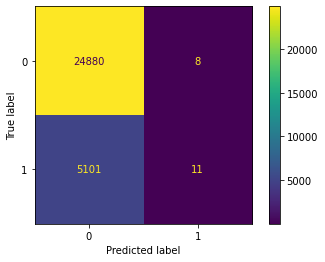

In [61]:
# Use the testing data to make predictions and determine the accuracy of your predictions.
y_pred = model.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()


1. Model is not able to predict 5101 click, which means they will not so much lose in advertisement as there is 24880 correct prediction of not click in site.
2. As data contain all 17% of click rate to train our model, so 11 is good number

Plot ROC Score

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.6238248645009454

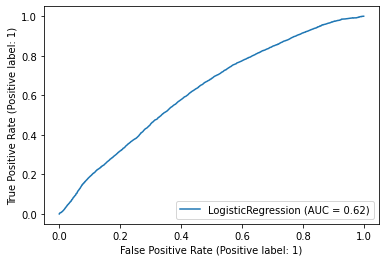

In [63]:
metrics.plot_roc_curve(model, X_test, y_test) 
plt.show()

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     24888
           1       0.58      0.00      0.00      5112

    accuracy                           0.83     30000
   macro avg       0.70      0.50      0.46     30000
weighted avg       0.79      0.83      0.75     30000



# Decision Tree and hypertunning

Reason to chose decision Tree:

Decision Trees handle skewed classes nicely and in our data there is only 17% click rate is present

In [65]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()
#as after one hot encoding there is no categorical varaible so no need to do label encoding

""
0
1
2
3
4


In [66]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [67]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     24888
           1       0.58      0.00      0.00      5112

    accuracy                           0.83     30000
   macro avg       0.71      0.50      0.45     30000
weighted avg       0.79      0.83      0.75     30000



In [68]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[24883     5]
 [ 5105     7]]
0.8296666666666667


## Now, Let tunning the hyperparameter of decision tree

Tuning max_depth

In [69]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [70]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.077365,0.005580,0.006179,0.000543,1,{'max_depth': 1},0.830500,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
1,0.104922,0.004518,0.005960,0.000067,2,{'max_depth': 2},0.830500,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
2,0.129263,0.003901,0.006313,0.000696,3,{'max_depth': 3},0.830500,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
3,0.150095,0.002177,0.006119,0.000106,4,{'max_depth': 4},0.830500,0.830429,0.830429,0.830429,0.830416,0.830440,0.000030,4,0.830497,0.830515,0.830461,0.830461,0.830518,0.830490,0.000025
4,0.178248,0.009175,0.006423,0.000406,5,{'max_depth': 5},0.830571,0.830357,0.830214,0.830143,0.830202,0.830298,0.000154,5,0.830568,0.830658,0.830711,0.830711,0.830786,0.830687,0.000072


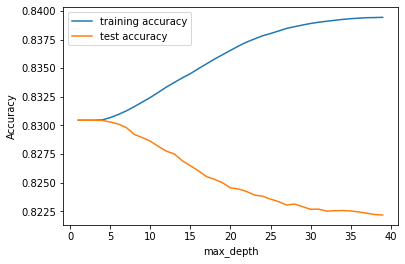

In [71]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Tuning min_samples_leaf

In [72]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [73]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.573928,0.022214,0.010967,0.000744,5,{'min_samples_leaf': 5},0.826929,0.826857,0.827357,0.827143,0.827345,0.827126,0.000206,10,0.832408,0.832443,0.832301,0.832086,0.832571,0.832362,0.000163
1,0.507740,0.053211,0.010262,0.001521,25,{'min_samples_leaf': 25},0.829643,0.830071,0.829571,0.830143,0.829916,0.829869,0.000227,9,0.830479,0.830604,0.830765,0.830497,0.830482,0.830565,0.000110
2,0.491247,0.031609,0.010509,0.001568,45,{'min_samples_leaf': 45},0.830500,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
3,0.516909,0.262703,0.013614,0.012097,65,{'min_samples_leaf': 65},0.830500,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
4,0.465408,0.054035,0.008391,0.000680,85,{'min_samples_leaf': 85},0.830500,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008


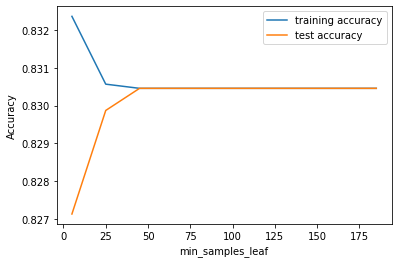

In [74]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

Tuning min_samples_split

In [75]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [76]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.468783,0.049550,0.010074,0.001429,5,{'min_samples_split': 5},0.823071,0.823571,0.824000,0.824000,0.822630,0.823455,0.000536,10,0.837801,0.838086,0.837854,0.837551,0.838071,0.837873,0.000197
1,0.431854,0.013332,0.008551,0.000135,25,{'min_samples_split': 25},0.825071,0.825643,0.825786,0.826429,0.824916,0.825569,0.000541,9,0.834872,0.834354,0.834676,0.834426,0.835000,0.834665,0.000249
2,0.482621,0.061290,0.009114,0.000926,45,{'min_samples_split': 45},0.825714,0.827714,0.825929,0.826714,0.826416,0.826498,0.000703,8,0.833443,0.832765,0.833158,0.833104,0.833375,0.833169,0.000239
3,0.440962,0.041192,0.008635,0.000589,65,{'min_samples_split': 65},0.826286,0.827857,0.826714,0.828071,0.828202,0.827426,0.000776,7,0.832586,0.831961,0.832283,0.832265,0.832429,0.832305,0.000207
4,0.420576,0.013364,0.008225,0.000167,85,{'min_samples_split': 85},0.826571,0.827786,0.827357,0.828357,0.828488,0.827712,0.000700,6,0.832354,0.831711,0.831926,0.831926,0.832054,0.831994,0.000211


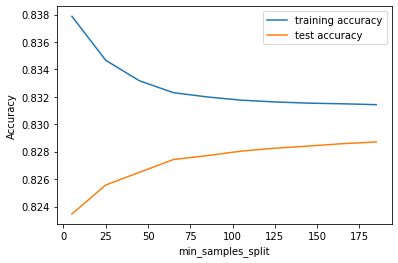

In [77]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Grid Search to Find Optimal Hyperparameters

In [78]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, verbose=1)

In [79]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.193514,0.015434,0.007684,0.001741,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.8305,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
1,0.282118,0.139221,0.010825,0.008685,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.8305,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
2,0.173947,0.004919,0.006213,0.000209,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.8305,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
3,0.171094,0.001745,0.005977,0.000024,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.8305,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
4,0.296552,0.023429,0.007314,0.000773,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.8305,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
5,0.324942,0.024086,0.007803,0.000663,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.8305,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
6,0.267898,0.001746,0.006574,0.000176,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.8305,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
7,0.472628,0.183927,0.009175,0.001948,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.8305,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
8,0.191084,0.017543,0.006780,0.000734,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.8305,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008
9,0.194638,0.014612,0.007302,0.000699,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.8305,0.830429,0.830429,0.830429,0.830488,0.830455,0.000032,1,0.830443,0.830461,0.830461,0.830461,0.830446,0.830455,0.000008


In [80]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8304547212555999
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


In [81]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [82]:
clf_gini.score(X_test,y_test)

0.8296

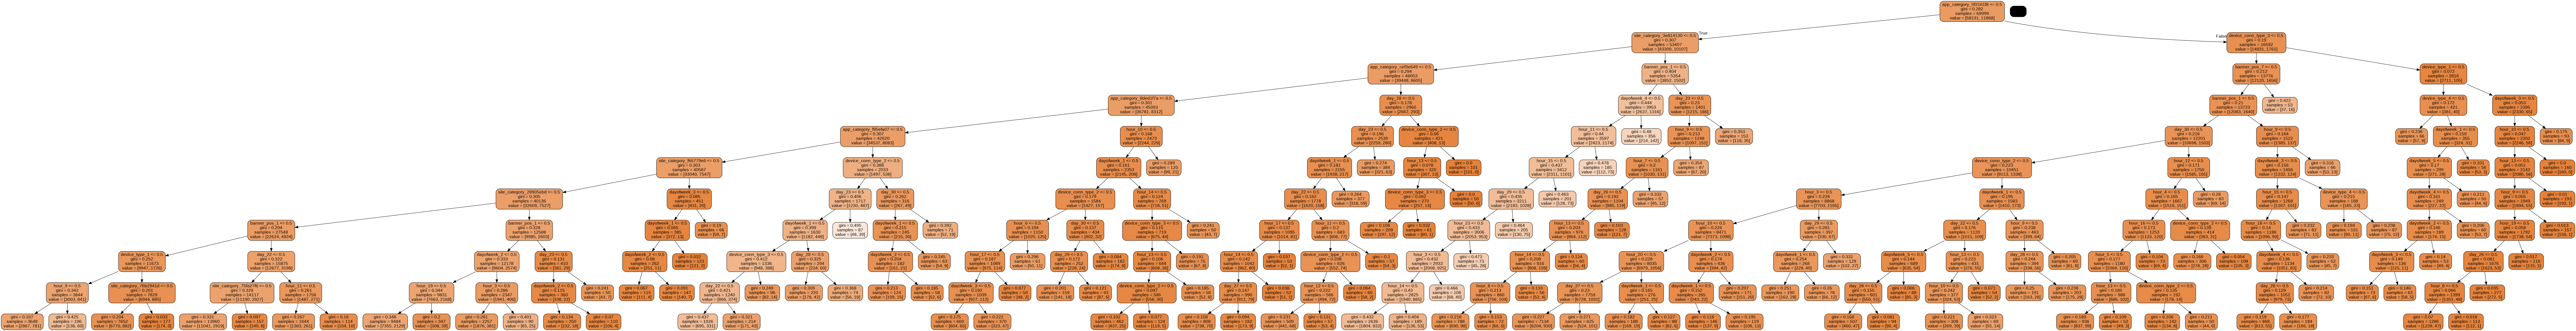

In [83]:
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=list(X),filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [84]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8296


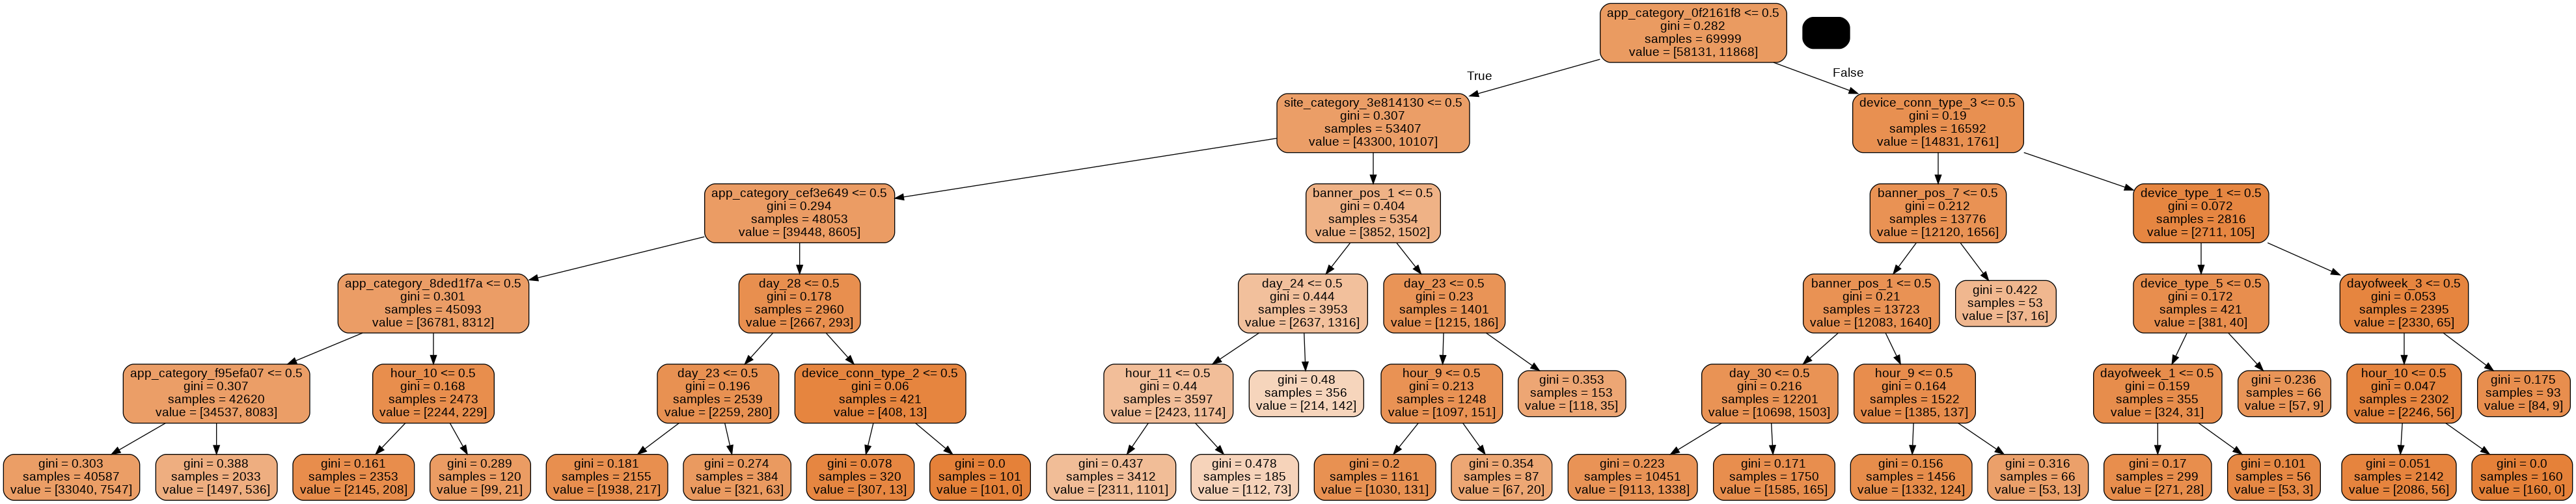

In [85]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=list(X),filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [86]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt_default.predict_proba(X_test)[:, 1])

0.6065141552464901

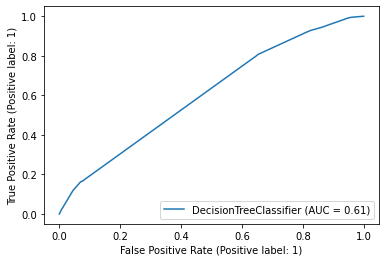

In [87]:
metrics.plot_roc_curve(dt_default, X_test, y_test) 
plt.show()

# Random forest and hypertunning

Reason to chose Random Forest

RandomForest dropbacks on this particular area are about using a sparse matrix with numerous features so we could only use a little depth in our trees and this indicates that we possibly can not have good accuracy.

In [97]:
#parameter import for RandomForest
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)

#Training the model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=155, max_features=55, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)

In [96]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
print('Classification Report:\n')
print(classification_report(y_test, predict_rf))

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     24888
           1       0.26      0.03      0.05      5112

    accuracy                           0.82     30000
   macro avg       0.54      0.51      0.47     30000
weighted avg       0.73      0.82      0.76     30000



## Now, let tune hyperparameter of Random forest tree

In [90]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = np.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", np.round(np.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", np.round(np.array(scores).std(), 5))
    print("Range:\t\t\t\t", np.round(np.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {np.round(recall_score(y_test, ensemble_preds), 5)}')

In [91]:
print_recall_scores(model_rf, X_test, y_test)

Recall for Base Model 1:	 0.04519
----------------------------------------
Recall for Base Model 2:	 0.03912
----------------------------------------
Recall for Base Model 3:	 0.03071
----------------------------------------
Recall for Base Model 4:	 0.03247
----------------------------------------
Recall for Base Model 5:	 0.03951
----------------------------------------
Recall for Base Model 6:	 0.03658
----------------------------------------
Recall for Base Model 7:	 0.03756
----------------------------------------
Recall for Base Model 8:	 0.0401
----------------------------------------
Recall for Base Model 9:	 0.03991
----------------------------------------
Recall for Base Model 10:	 0.03873
Mean Recall Score:		 0.03799
Std Deviation:			 0.00387
Range:				 0.01448
Overall Recall for model:	 0.02778


In [92]:
from sklearn.ensemble import RandomForestClassifier

model_rf_oob = RandomForestClassifier(n_estimators=100, max_features=7, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)

OOB Score:			 0.8231
Testing Accuracy:		 0.8213
Acc. Difference:		 0.0018


In [93]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,model_rf_oob.predict_proba(X_test)[:, 1])

0.6122781430134073

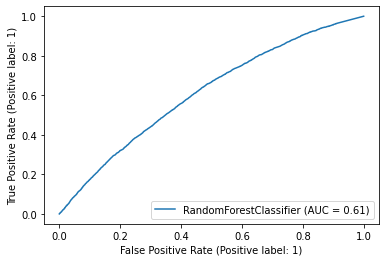

In [94]:
metrics.plot_roc_curve(model_rf_oob, X_test, y_test) 
plt.show()

# Compare which methods work best based on the evaluation metrics.

  Model             :AUC,       Accuracy

---


  LogisticRegression: 0.62,       0.83

---


decision tree :    0.608,0.83


---


random forest :     0.61,       0.82 

AUC score of Logistic regression is better than other two classification algorithm

